# Pandas Visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

In [2]:
# see the pre-defined styles provided.
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [3]:
# use the 'seaborn-colorblind' style
plt.style.use('seaborn-colorblind')

### DataFrame.plot

In [61]:
np.random.seed(123)

df = pd.DataFrame({'A': np.random.randn(365).cumsum(0), 
                   'B': np.random.randn(365).cumsum(0) + 20,
                   'C': np.random.randn(365).cumsum(0) - 20,
                   'D': np.random.randn(365),
                   'E': np.random.randn(365) + 20,
                   'F': np.random.randn(365) - 20,}, 
                  index=pd.date_range('1/1/2017', periods=365))
df.head()

,A,B,C,D,E,F
2017-01-01,-1.085631,20.059291,-20.230904,-1.725890,20.232037,-19.806906
2017-01-02,-0.088285,21.803332,-16.659325,0.611238,21.500923,-19.560530
2017-01-03,0.194693,20.835588,-17.055481,1.309351,20.491957,-18.617827
2017-01-04,-1.311601,21.255156,-17.093802,0.695880,19.810618,-20.131865
2017-01-05,-1.890202,21.462083,-19.518638,0.320308,20.059943,-21.394709


In [56]:
a = np.linspace(1, 10, 10).astype(int).tolist()
b = np.linspace(1, 10, 10).cumsum(0, np.int32).tolist()
print(a, b, sep="\n")

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 3, 6, 10, 15, 21, 28, 36, 45, 55]


<IPython.core.display.Javascript object>


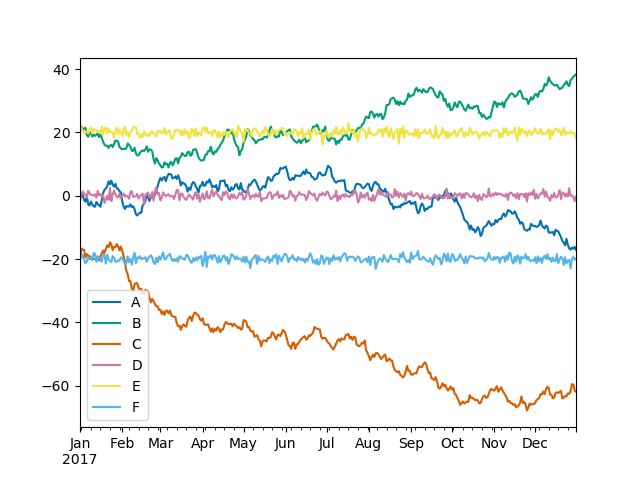

In [62]:
df.plot(); # add a semi-colon to the end of the plotting call to suppress unwanted output

We can select which plot we want to use by passing it into the 'kind' parameter.

<IPython.core.display.Javascript object>


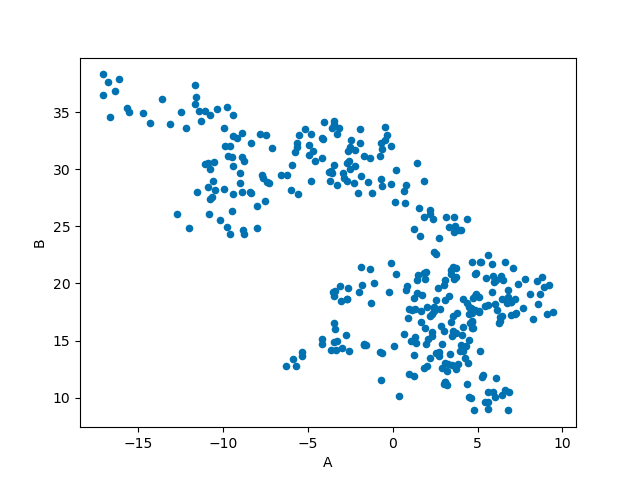

In [63]:
df.plot('A','B', kind = 'scatter');

You can also choose the plot kind by using the `DataFrame.plot.kind` methods instead of providing the `kind` keyword argument.

`kind` :
- `'line'` : line plot (default)
- `'bar'` : vertical bar plot
- `'barh'` : horizontal bar plot
- `'hist'` : histogram
- `'box'` : boxplot
- `'kde'` : Kernel Density Estimation plot
- `'density'` : same as 'kde'
- `'area'` : area plot
- `'pie'` : pie plot
- `'scatter'` : scatter plot
- `'hexbin'` : hexbin plot

<IPython.core.display.Javascript object>


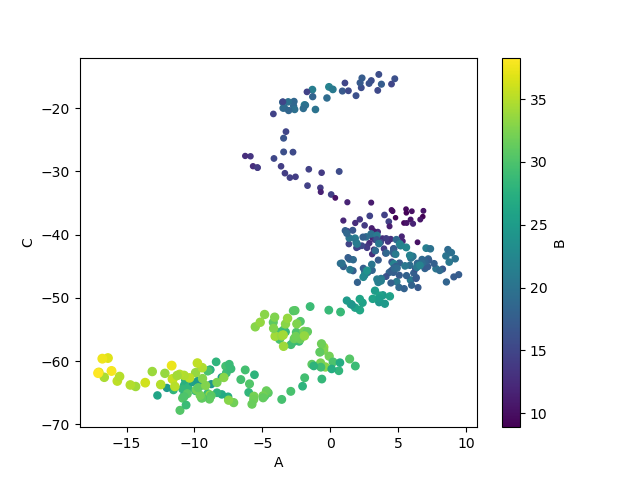

In [68]:
# create a scatter plot of columns 'A' and 'C', with changing color (c) and size (s) based on column 'B'
df.plot.scatter('A', 'C', c='B', s=df['B'], colormap='viridis')

<IPython.core.display.Javascript object>


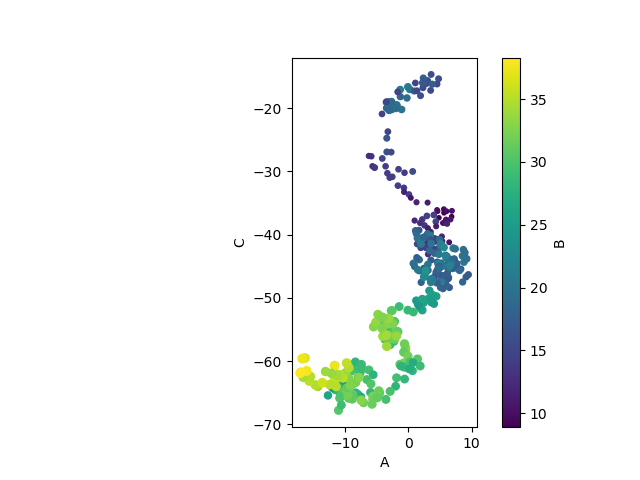

In [69]:
ax = df.plot.scatter('A', 'C', c='B', s=df['B'], colormap='viridis')
ax.set_aspect('equal')

<IPython.core.display.Javascript object>


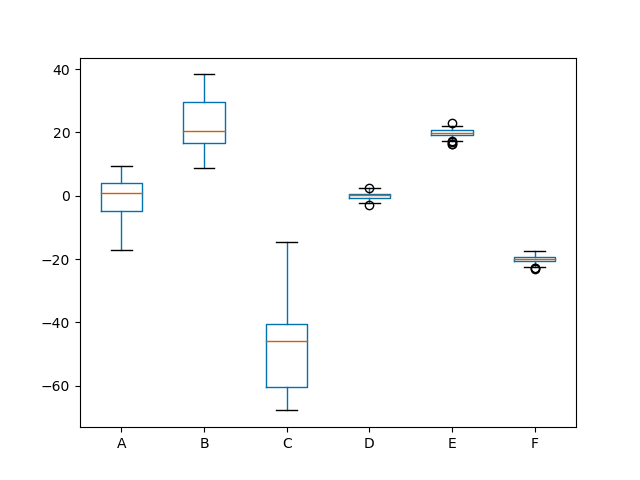

In [70]:
df.plot.box();

<IPython.core.display.Javascript object>


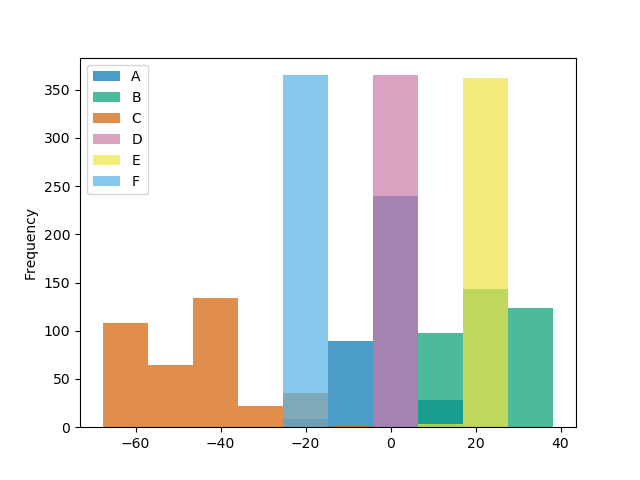

In [71]:
df.plot.hist(alpha=0.7);

[Kernel density estimation plots](https://en.wikipedia.org/wiki/Kernel_density_estimation) are useful for deriving a smooth continuous function from a given sample.

<IPython.core.display.Javascript object>


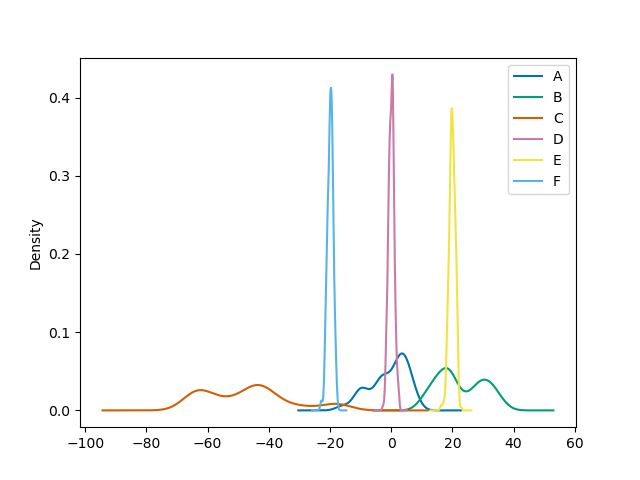

In [72]:
df.plot.kde();

### pandas.tools.plotting

[Iris flower data set](https://en.wikipedia.org/wiki/Iris_flower_data_set)

In [73]:
iris = pd.read_csv('iris.csv')
iris.head()

FileNotFoundError: [Errno 2] File iris.csv does not exist: 'iris.csv'

In [ ]:
pd.tools.plotting.scatter_matrix(iris);

In [ ]:
plt.figure()
pd.tools.plotting.parallel_coordinates(iris, 'Name');

# Seaborn

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook

In [76]:
np.random.seed(1234)

v1 = pd.Series(np.random.normal(0,10,1000), name='v1')
v2 = pd.Series(2*v1 + np.random.normal(60,15,1000), name='v2')

<IPython.core.display.Javascript object>


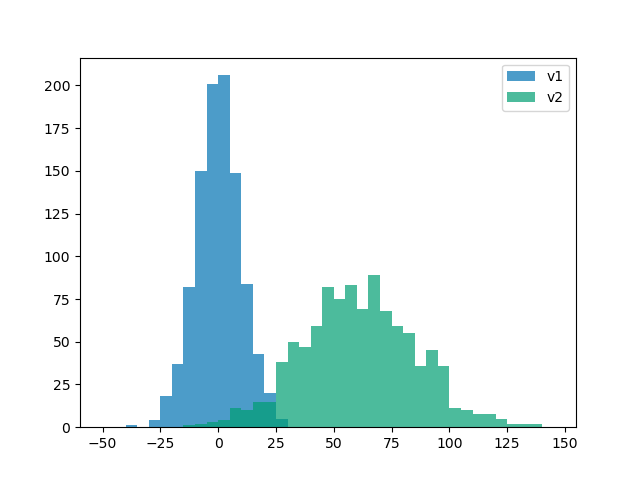

In [77]:
plt.figure()
plt.hist(v1, alpha=0.7, bins=np.arange(-50,150,5), label='v1');
plt.hist(v2, alpha=0.7, bins=np.arange(-50,150,5), label='v2');
plt.legend();

<IPython.core.display.Javascript object>


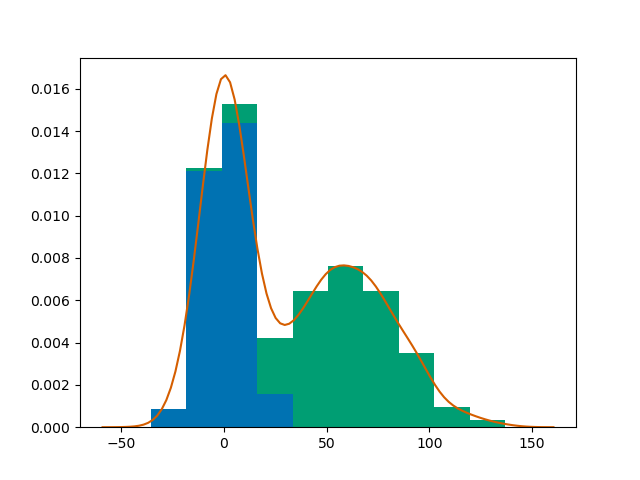

<ipython-input-78-aab272ed0abc>:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  plt.hist([v1, v2], histtype='barstacked', normed=True);


In [78]:
# plot a kernel density estimation over a stacked barchart
plt.figure()
plt.hist([v1, v2], histtype='barstacked', normed=True);
v3 = np.concatenate((v1,v2))
sns.kdeplot(v3);

<IPython.core.display.Javascript object>


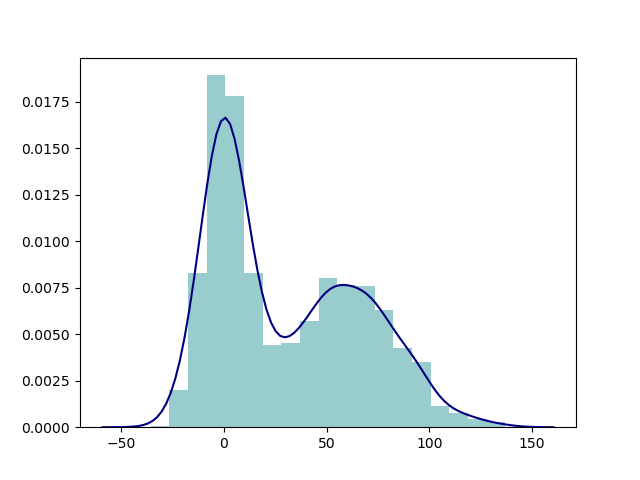

In [79]:
plt.figure()
# we can pass keyword arguments for each individual component of the plot
sns.distplot(v3, hist_kws={'color': 'Teal'}, kde_kws={'color': 'Navy'});

<IPython.core.display.Javascript object>


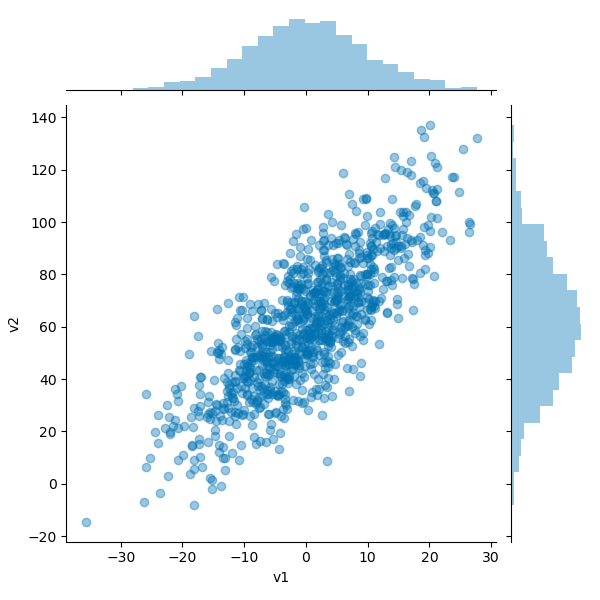

In [80]:
sns.jointplot(v1, v2, alpha=0.4);

<IPython.core.display.Javascript object>


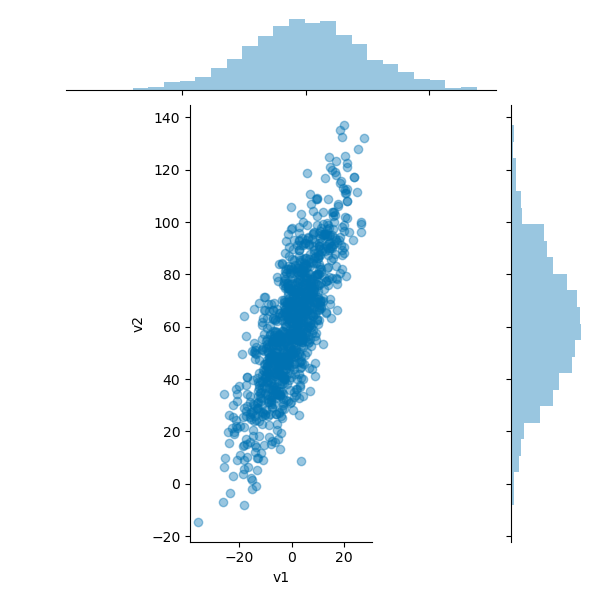

In [81]:
grid = sns.jointplot(v1, v2, alpha=0.4);
grid.ax_joint.set_aspect('equal')

<IPython.core.display.Javascript object>


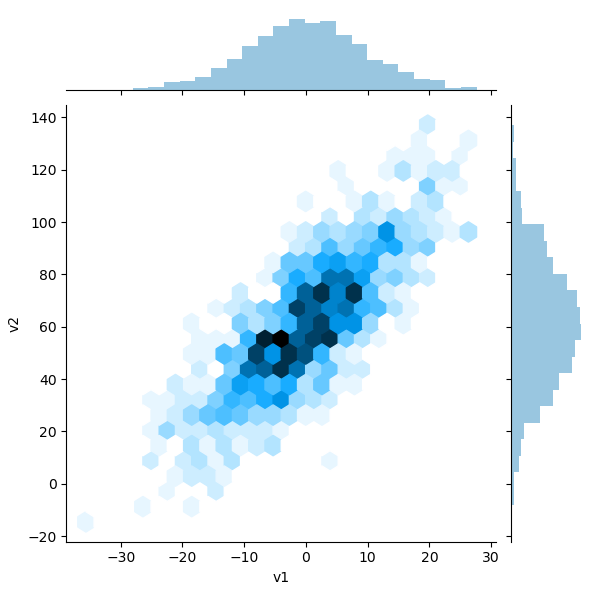

In [82]:
sns.jointplot(v1, v2, kind='hex');

<IPython.core.display.Javascript object>


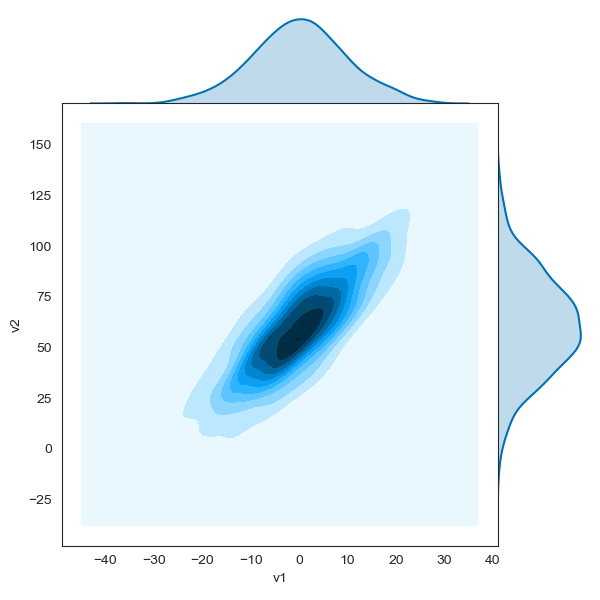

In [83]:
# set the seaborn style for all the following plots
sns.set_style('white')

sns.jointplot(v1, v2, kind='kde', space=0);

In [84]:
iris = pd.read_csv('iris.csv')
iris.head()

FileNotFoundError: [Errno 2] File iris.csv does not exist: 'iris.csv'

In [85]:
sns.pairplot(iris, hue='Name', diag_kind='kde', size=2);

NameError: name 'iris' is not defined

<IPython.core.display.Javascript object>


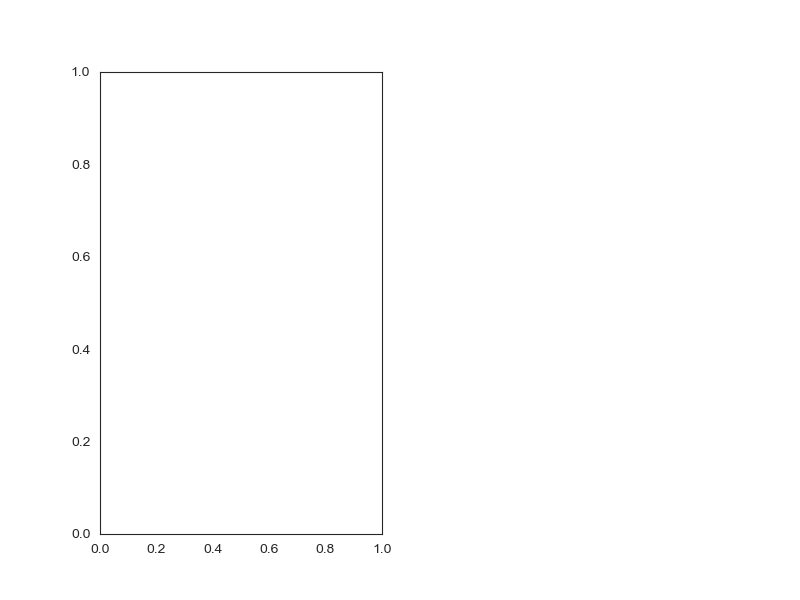

NameError: name 'iris' is not defined

In [86]:
plt.figure(figsize=(8,6))
plt.subplot(121)
sns.swarmplot('Name', 'PetalLength', data=iris);
plt.subplot(122)
sns.violinplot('Name', 'PetalLength', data=iris);